# Reshape matrix

### Naive reshape

In [5]:
mat4d_crop_reshape = mat4d_crop.reshape((int(270*210*210/(3*3*3)),3*3*3*4))
print(mat4d_crop_reshape.shape)

#reshape mtThresh
mt_thresh_reshape = mt_thres_crop.reshape((int(270*210*210/(3*3*3)),3*3*3))
print(mt_thresh_reshape.shape)

In [105]:

matrix_10 = np.zeros((9,210,210))
for i in range(9):
    matrix_10[i,:,:] = np.median(mt_thres_crop[i*30:(i+1)*30,:,:], axis=0)
matrix_10.shape

(9, 210, 210)

### Loop reshape

In [83]:
mat_to_analyze = mat4d
scan_depth = 380
scan_width_height = 300
num_of_chan = 4
w_h_d = 20

rect_mat = np.zeros((int(scan_depth/w_h_d)*int(scan_width_height/w_h_d)*int(scan_width_height/w_h_d), w_h_d,w_h_d, w_h_d, num_of_chan))
# rect_mat = np.zeros((int(270/w_h_d)*int(210/w_h_d)*int(210/w_h_d), w_h_d,w_h_d, w_h_d))
count = 0
for k in range(int(scan_depth/w_h_d)):
    for i in range(int(scan_width_height/w_h_d)):
        for j in range(int(scan_width_height/w_h_d)):
#             print("k=",k, "i=",i , "j=",j)
            rect_mat[count, :, :, :, :] = mat_to_analyze[k*w_h_d:(k+1)*w_h_d, i*w_h_d:(i+1)*w_h_d,j*w_h_d:(j+1)*w_h_d, :]
#             rect_mat[count, :, :, :] = mat_to_analyze[k*w_h_d:(k+1)*w_h_d, i*w_h_d:(i+1)*w_h_d,j*w_h_d:(j+1)*w_h_d] 
            count += 1

mat = rect_mat.reshape(int(scan_depth/w_h_d)*int(scan_width_height/w_h_d)*int(scan_width_height/w_h_d), w_h_d*w_h_d*w_h_d * num_of_chan)
# mat = rect_mat.reshape(int(270/w_h_d)*int(210/w_h_d)*int(210/w_h_d), w_h_d*w_h_d*w_h_d)
mat.shape

(4275, 32000)

# TSNE

## Fit TSNE

In [395]:
%%time
from sklearn.manifold import TSNE

data = mat
tsne = TSNE(n_jobs = -1, verbose=1).fit_transform(data)
df_tsne = pd.DataFrame(tsne)

## Load saved TSNE

In [116]:
fpath = '/home/labs/bioservices/eligol/NoteBooks/06_pregnancy_MRI/code/figures/TSNE/embeddings/TSNE_4channels_202020.csv'
df_tsne = pd.read_csv(fpath, index_col = 0)
df_tsne.columns

Index(['0', '1'], dtype='object')

## Plot TSNE

Text(0.5, 1.0, 'T_SNE projection of MRI')

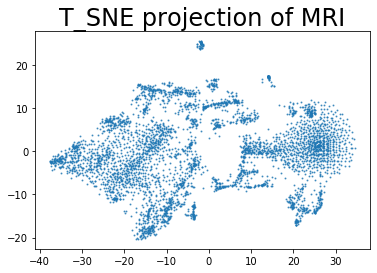

In [117]:
plt.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], s=1,alpha=0.7)
plt.title('T_SNE projection of MRI', fontsize=24)

In [115]:
df_tsne.shape

(1300, 2)

Text(0.5, 1.0, 'T_SNE projection of MRI')

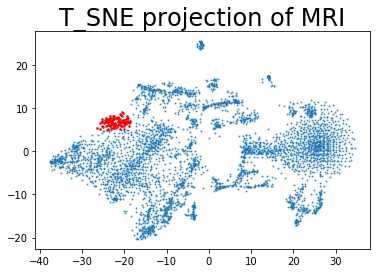

In [136]:
import pandas as pd

to_color = df_tsne[(df_tsne['0'] > -30) & (df_tsne['0'] < -18) & (df_tsne['1'] > 5) & (df_tsne['1'] < 10)]
fig, ax = plt.subplots()

ax.scatter(df_tsne.loc[:, '0'], df_tsne.loc[:, '1'], s=1,alpha=0.7)
ax.scatter(to_color.loc[:, '0'], to_color.loc[:, '1'], color='red', s=3,alpha=0.7)
ax.set_title('T_SNE projection of MRI', fontsize=24)

In [137]:
no_change_idx = df_tsne.index.difference(to_color.index)
mask_idx = to_color.index

mask_mat = rect_mat.copy()
mask_mat[no_change_idx, :,:,:,:] = 0
mask_mat[mask_idx, :,:,:,:] = 1

# recunstruct the original matrix
mask3D = np.zeros((scan_depth, scan_width_height, scan_width_height, num_of_chan))
count = 0
for k in range(int(scan_depth/w_h_d)):
    for i in range(int(scan_width_height/w_h_d)):
        for j in range(int(scan_width_height/w_h_d)):
#             print("k=",k, "i=",i , "j=",j)
            mask3D[k*w_h_d:(k+1)*w_h_d, i*w_h_d:(i+1)*w_h_d,j*w_h_d:(j+1)*w_h_d, :] = mask_mat[count, :, :, :, :]
            count += 1

In [138]:
# save the mask
for i in range(mask3D.shape[2]):
    plt.imsave('/home/labs/bioservices/eligol/NoteBooks/06_pregnancy_MRI/data/emc_0075/0075_mask{}.png'.format(i), mask3D[:,i,:,0])

# PCA

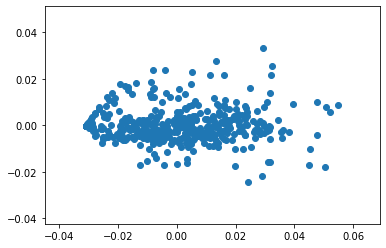

In [123]:
from sklearn.decomposition import PCA
data = mat

pca = PCA(n_components=2)
pca = pca.fit_transform(data)

plt.scatter(pca[:, 0], pca[:, 1])

In [25]:
pca.shape

(270, 2)